# Importing data and libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
buckets = pd.read_parquet('/processed_data/buckets_for_worn_unworn_model.parquet')
buckets

,series_id,bucket,step,worn,hour,enmo,enmo_std,anglez_log,anglez_std,anglez_value_counts,target,anglez_log_ewma,enmo_ewma
0,038441c925bb,2018-08-15,"[16200, 16212, 16224, 16236, 16248, 16260, 162...",1,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[-0.5445473, -0.5384195, -0.55367094, 2.207655...","[-0.3984071, -0.43412158, -0.40988225, 2.16966...","[-1.1600173, -1.0104151, -1.0199851, 0.0843932...","[-0.7463166, -0.8548056, -0.8091363, 0.5429577...","[3, 2, 2, 6, 2, 4, 2, 1, 3, 1, 1, 3, 2, 2, 9, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-1.9347463538710923, -1.8052268870075403, -1....","[-0.8166037670768754, -0.8118206280960815, -0...."
1,038441c925bb,2018-08-16,"[33480, 33492, 33504, 33516, 33528, 33540, 335...",1,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[0.23109697, 0.09120488, 0.033813287, 0.026639...","[-0.20623524, -0.11359837, -0.052542243, -0.14...","[-0.008634078, 0.08142903, 0.30459088, 0.27667...","[1.3266863, 1.6417787, 1.327748, 1.3931719, 2....","[5, 2, 2, 2, 2, 1, 2, 10, 6, 2, 2, 5, 7, 2, 1,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.012038710129515684, 0.0613677671531428, 0....","[0.4748477605776372, 0.3245841466999011, 0.232..."
2,038441c925bb,2018-08-17,"[50760, 50772, 50784, 50796, 50808, 50820, 508...",1,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[-0.2527756, 1.1799846, 1.5040432, 5.1157236, ...","[0.28345567, 1.0553511, 1.8320727, 4.9168553, ...","[0.15004267, 0.43735644, 0.38528717, 0.5604871...","[-0.24063708, -0.0013753887, 0.13565959, 0.492...","[4, 5, 2, 1, 5, 6, 1, 5, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.22597487040083097, 0.4316607742666523, 0.47...","[-0.4886070050651297, 0.9160947103060656, 1.60..."
3,038441c925bb,2018-08-18,"[68040, 68052, 68064, 68076, 68088, 68100, 681...",-1,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[0.6479936, 0.8932235, 2.833645, 0.38491568, -...","[0.572238, 1.5555285, 0.8140591, 0.75956106, -...","[1.5341367, 1.3622736, 1.2962915, -0.18275754,...","[4.216422, 5.2023964, 4.2594304, 11.148555, -0...","[1, 3, 2, 1, 1, 3, 1, 2, 3, 2, 2, 3, 2, 5, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2.996684334602296, 2.8238807476625687, 2.7206...","[0.7927296714407751, 0.9473498559096987, 1.841..."
4,038441c925bb,2018-08-19,"[85320, 85332, 85344, 85356, 85368, 85380, 853...",1,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[1.6512856, 1.8624821, 0.9738643, 2.1458478, 0...","[0.90756637, 0.44645062, 0.3423575, 0.84843844...","[0.44042394, 0.48366603, 0.49500227, 0.4920682...","[-0.6051638, -0.38935748, -0.44705674, -0.5597...","[10, 10, 7, 7, 7, 9, 7, 7, 12, 7, 6, 10, 7, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.609311828397926, 0.6400164544268537, 0.6557...","[3.220535111723647, 3.433440106797489, 2.88742..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7122,fe90110788d2,2017-09-02,"[498600, 498612, 498624, 498636, 498648, 49866...",1,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[-0.3279393, -0.4066907, 2.6973493, 5.6780057,...","[-0.3427481, -0.39012942, 1.776904, 6.677664, ...","[0.1501439, 0.4003192, 0.7685825, 0.80678415, ...","[0.11387296, 0.097320296, 0.69500685, 1.515731...","[3, 3, 3, 2, 2, 2, 2, 1, 2, 1, 3, 3, 4, 3, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.2164263808870767, 0.40522385744755934, 0.65...","[-0.49887990398172893, -0.5585192570848653, 1...."
7123,fe90110788d2,2017-09-03,"[515880, 515892, 515904, 515916, 515928, 51594...",1,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[-0.39168963, 0.02547008, -0.21197024, 0.09981...","[-0.32646853, -0.17424636, -0.2246426, 0.05075...","[0.8239082, 0.7366087, 0.5501097, 0.91960484, ...","[-0.7439602, 0.40150043, 0.6085535, 1.701254, ...","[2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 4, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.9683353925295484, 0.9151247348357161, 0.819...","[-0.6312028539221515, -0.28394

adding std and mad on sliding windows of 30 minuetes on anglez-log for every bucket

In [ ]:
# **adding std and mad on sliding windows of 30 minuetes on anglez-log for every bucket**
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

# Efficient sliding window std
def sliding_window_std(array, window_size=10):
    if len(array) < window_size:
        return np.array([0] * len(array))  # Handle edge cases
    windows = sliding_window_view(array, window_shape=window_size)  # Create overlapping windows
    return np.std(windows, axis=1)

# Efficient sliding window mad
def sliding_window_mad(array, window_size=10):
    if len(array) < window_size:
        return np.array([0] * len(array))  # Handle edge cases
    windows = sliding_window_view(array, window_shape=window_size)  # Create overlapping windows
    return np.mean(np.abs(np.diff(windows, axis=1)), axis=1)
def pad_to_length(array, target_length=1440):
    pad_length = target_length - len(array)
    if pad_length > 0:
        return np.pad(array, (0, pad_length), mode='constant')
    return array
buckets['anglez_log_std'] = buckets['anglez_log'].apply(lambda x: sliding_window_std(np.array(x), window_size=30))
buckets['anglez_log_mad'] = buckets['anglez_log'].apply(lambda x: sliding_window_mad(np.array(x), window_size=30))


# Pad the sliding window results
buckets['anglez_log_std'] = buckets['anglez_log_std'].apply(lambda x: pad_to_length(x, 1440))
buckets['anglez_log_mad'] = buckets['anglez_log_mad'].apply(lambda x: pad_to_length(x, 1440))

# **XGBoost** accuracy = 0.96


Shape of flattened X: (7127, 12960)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:10:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Test Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.89      0.94       491
     Class 1       0.95      0.99      0.97       935

    accuracy                           0.96      1426
   macro avg       0.97      0.94      0.95      1426
weighted avg       0.96      0.96      0.96      1426


Top 10 Feature Importances:
anglez_value_counts_t1290: 0.1085
anglez_value_counts_t1279: 0.0435
anglez_value_counts_t363: 0.0322
anglez_value_counts_t413: 0.0316
anglez_value_counts_t1280: 0.0232
anglez_value_counts_t1254: 0.0213
anglez_value_counts_t355: 0.0175
anglez_value_counts_t368: 0.0139
anglez_value_counts_t1282: 0.0101
anglez_value_counts_t444: 0.0100


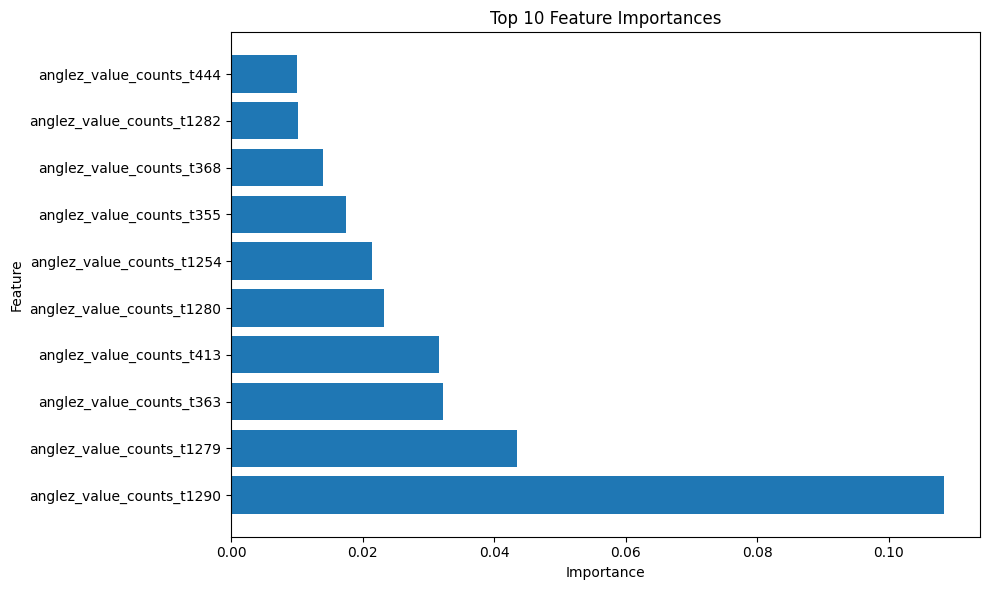

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# adding hour_sin, hour_cos
buckets['hour_sin'] = buckets['hour'].apply(lambda x: np.sin(2 * np.pi * x / 24))
buckets['hour_cos'] = buckets['hour'].apply(lambda x: np.cos(2 * np.pi * x / 24))
# Feature engineering: Prepare features and targets
features = []
targets = []

for _, row in buckets.iterrows():
    # Stack all features into a single array for the row
    feature_matrix = np.column_stack([
        row['anglez_log_ewma'],
        row['anglez_log_std'],
        row['anglez_log_mad'],
        row['enmo_ewma'],
        row['enmo_std'],
        row['anglez_std'],
        row['anglez_value_counts'],
        row['hour_sin'],
        row['hour_cos']
    ])
    features.append(feature_matrix)
    targets.append(row['worn'])

# Convert features and targets to numpy arrays
X = np.array(features)  # Shape: (n_samples, 1440, n_features)
y = np.array(targets)   # Shape: (n_samples,)

# Flatten the input arrays into 1D vectors
X_flattened = X.reshape(X.shape[0], -1)  # Shape: (num_samples, features)
print(f"Shape of flattened X: {X_flattened.shape}")

# Convert target labels (-1/1 to 0/1)
y_binary = (y + 1) // 2

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y_binary, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200,      # Number of trees
    learning_rate=0.1,     # Learning rate
    max_depth=6,           # Maximum depth of trees
    random_state=42,       # For reproducibility
    use_label_encoder=False,  # Avoid label encoding warnings
    eval_metric="logloss"     # Metric for evaluation
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Test Accuracy: {accuracy:.2f}")

# Classification Report
classification_rep = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("\nClassification Report:")
print(classification_rep)

# Feature Importances
feature_importances = xgb_model.feature_importances_
num_time_steps = X.shape[1]
num_features = 8  # Number of original features
feature_names = [
    "anglez_log_ewma", "anglez_log_std", "anglez_log_mad", "enmo_ewma",
    "enmo_std", "anglez_std", "anglez_value_counts", "hour_sin", "hour_cos"
]

# Map feature indices to original names and time steps
mapped_feature_names = [f"{name}_t{i}" for i in range(num_time_steps) for name in feature_names]

# Find top 10 important features
top_features = np.argsort(feature_importances)[-10:]
print("\nTop 10 Feature Importances:")
for idx in reversed(top_features):
    print(f"{mapped_feature_names[idx]}: {feature_importances[idx]:.4f}")

# Plot Feature Importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(
    [mapped_feature_names[idx] for idx in reversed(top_features)],
    [feature_importances[idx] for idx in reversed(top_features)]
)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# **CNN** accuracy = 0.95

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.6955 - loss: 63.8628 - val_accuracy: 0.8142 - val_loss: 0.5594
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7028 - loss: 1.1005 - val_accuracy: 0.8135 - val_loss: 0.4682
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7196 - loss: 0.6470 - val_accuracy: 0.8233 - val_loss: 0.3931
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7491 - loss: 1.3238 - val_accuracy: 0.8443 - val_loss: 0.4082
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8241 - loss: 0.7055 - val_accuracy: 0.8359 - val_loss: 0.4442
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8130 - loss: 0.5745 - val_accuracy: 0.8724 - val_loss: 0.3724
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8362 - loss: 0.4349 - val_accuracy: 0.8787 - val_loss: 0.3516
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8511 - loss: 0.3837 

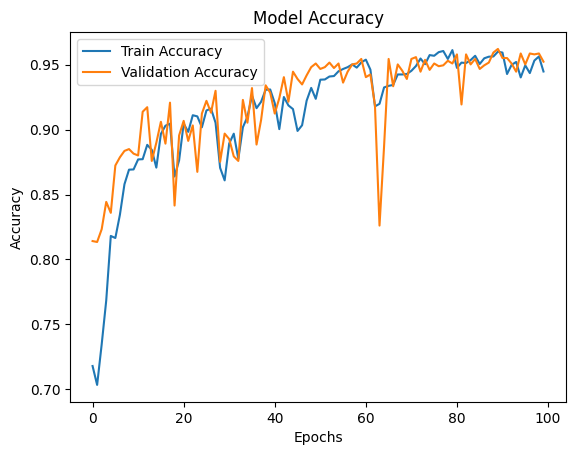

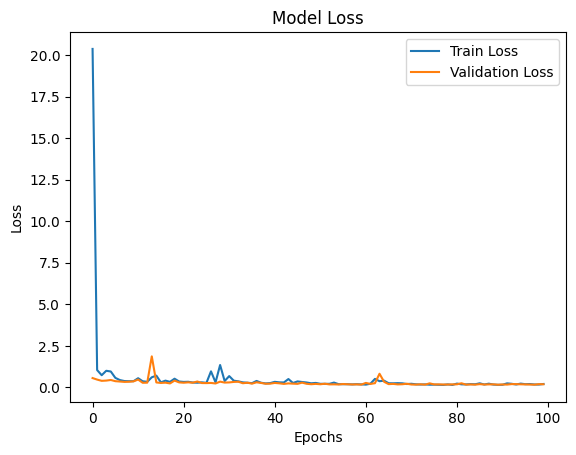

In [ ]:
features = []
targets = []

for _, row in buckets.iterrows():
    # Stack all features into a single array for the row
    feature_matrix = np.column_stack([
        row['anglez_log_ewma'],
        row['anglez_log_std'],
        row['anglez_log_mad'],
        row['enmo_ewma'],
        row['enmo_std'],
        row['anglez_std'],
        row['anglez_value_counts'],
        row['hour']
    ])

    features.append(feature_matrix)
    targets.append(row['worn'])


# Ensure X has the correct shape for CNN: (n_samples, time_steps, n_features)
X = np.array(features)  # Shape: (n_samples, 1440, n_features)
y = np.array(targets)   # Shape: (n_samples,)

# Convert target labels from -1, 1 to 0, 1 (required for binary cross-entropy)
y_binary = (y + 1) // 2  # -1 -> 0, 1 -> 1

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1440, X.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold for binary classification

# Convert predictions back to -1, 1
y_pred_original = (y_pred * 2 - 1).flatten()  # 0 -> -1, 1 -> 1

# Classification report
print("\nClassification Report:\n", classification_report((y_test * 2 - 1), y_pred_original))
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# **random forrest** accuracy = 0.95

Shape of flattened X: (7127, 11520)
Random Forest Test Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       491
           1       0.93      0.99      0.96       935

    accuracy                           0.95      1426
   macro avg       0.96      0.93      0.94      1426
weighted avg       0.95      0.95      0.95      1426


Top 10 Feature Importances:
anglez_value_counts_t331: 0.0105
anglez_value_counts_t1273: 0.0082
anglez_value_counts_t1296: 0.0078
anglez_value_counts_t1229: 0.0076
anglez_value_counts_t1280: 0.0076
anglez_value_counts_t1269: 0.0074
anglez_value_counts_t1327: 0.0073
anglez_value_counts_t1290: 0.0073
anglez_value_counts_t355: 0.0073
anglez_value_counts_t1346: 0.0072


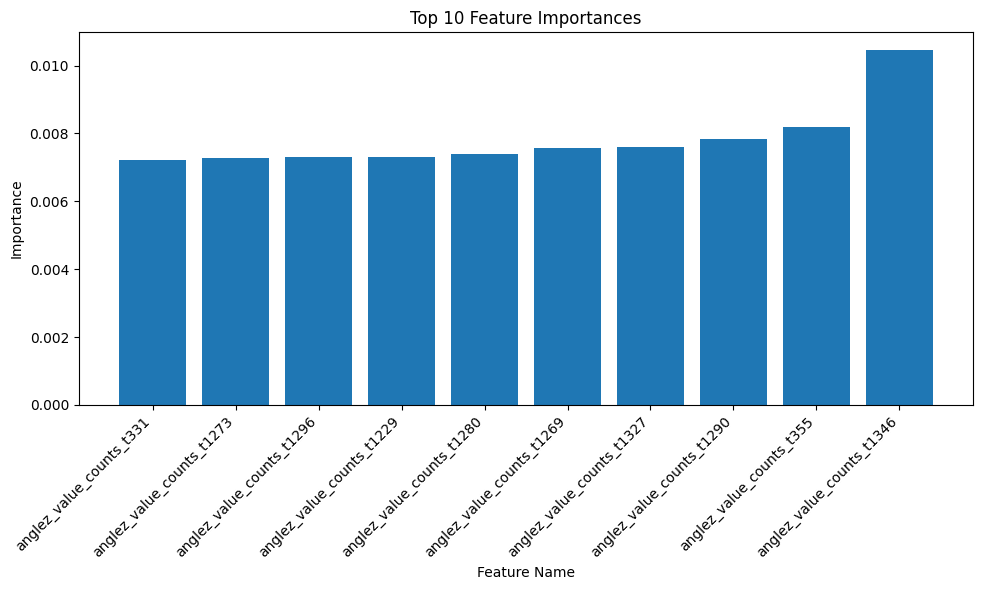

In [ ]:
# Feature names for mapping
feature_names = [
    "anglez_log_ewma",
    "anglez_log_std",
    "anglez_log_mad",
    "enmo_ewma",
    "enmo_std",
    "anglez_std",
    "anglez_value_counts",
    "hour"
]

# Prepare data
features = []
targets = []

for _, row in buckets.iterrows():
    # Stack all features into a single array for the row
    feature_matrix = np.column_stack([
        row['anglez_log_ewma'],
        row['anglez_log_std'],
        row['anglez_log_mad'],
        row['enmo_ewma'],
        row['enmo_std'],
        row['anglez_std'],
        row['anglez_value_counts'],
        row['hour']
    ])
    features.append(feature_matrix)
    targets.append(row['worn'])

# Convert features to numpy array
X = np.array(features)  # Shape: (n_samples, 1440, n_features)
y = np.array(targets)   # Shape: (n_samples,)

# Flatten the input arrays into 1D vectors for Random Forest
X_flattened = X.reshape(X.shape[0], -1)  # Shape: (num_samples, features)
print(f"Shape of flattened X: {X_flattened.shape}")

# Convert target labels if needed
y_binary = (y + 1) // 2  # Convert -1/1 to 0/1 if necessary

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y_binary, test_size=0.2, random_state=42)

# Train the Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1  # Use all available cores
)
rf_model.fit(X_train, y_train)

# Evaluate the Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance (Text and Visualization)
feature_importances = rf_model.feature_importances_

# Map feature indices to their names
num_time_steps = X.shape[1]  # Number of time steps (e.g., 1440)
num_features = len(feature_names)
mapped_feature_names = [f"{name}_t{i}" for i in range(num_time_steps) for name in feature_names]

# Print top 10 important features
top_features = np.argsort(feature_importances)[-10:]
print("\nTop 10 Feature Importances:")
for idx in reversed(top_features):
    print(f"{mapped_feature_names[idx]}: {feature_importances[idx]:.4f}")

# Plot Top 10 Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importances[top_features], tick_label=[mapped_feature_names[idx] for idx in reversed(top_features)])
plt.title("Top 10 Feature Importances")
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()